<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


## Markov Decision Process (30 Points)

HW3 :: Practical Question 2

<br>

Corresponding TA: Aryan Ahadinia, Saeed Hedayatiyan


In this question, We're going to implement a generic MDP solver, so we can solve every question by passing transition and reward functions. We use an example to test our implementation but it's important to write MDP solver functions in a generic form. So it's important to maintain notebook structure and only write codes and comment in annotated areas.

### Modeling a Problem (5 Points)

In a TV quiz show, there are several levels. At each level, if the participant answers the question correctly, they will receive some prize. If the participant's answer is wrong, they leave the competition empty-handed. Before each stage begins, the participant can decide whether to continue or withdraw and leave the game with the reward which they already earned.

Beside states representing each level, There are three terminal states of Win, Lost and Quit in the game. Actions in each state are quit and play. The player will go to the quit state with probability of 1 if they decide to take action quit. otherwise they will pass the level i by probability of win_ratio[i] and go to the state which represents the next level.

So the play / quit decision problem can be modeled as an MDP as below.

<p align="center">
<image src="./assets/quiz_problem.png">
</p>

Considering $100, $200, $300, $400 and $500 as rewards and 0.9, 0.7, 0.6, 0.3, 0.1 as win ratio for levels 0 to 4 respectively.

Complete two cells below to model the problem as an MDP. Write levels and actions as an str.


In [2]:
quiz_levels = [
    '0', '1', '2', '3', '4'
]
quiz_terminals = [
    'Win', 'Lost', 'Quit'
]

quiz_states = quiz_levels + quiz_terminals
quiz_actions = [
    'Play', 'Quit'
]


In [3]:
from typing import Callable
from typing import List
from typing import Tuple
from typing import Union


In [4]:
def quiz_transition(state: str, action: str, next_state: str) -> float:
    if action == 'Quit':
        if next_state == 'Quit':
            return float(1)
    if action == 'Play':
        if state == '0':
            if next_state == '1':
                return 0.9
            elif next_state == 'Lost':
                return 0.1
        elif state == '1':
            if next_state == '2':
                return 0.7
            elif next_state == 'Lost':
                return 0.3
        elif state == '2':
            if next_state == '3':
                return 0.6
            elif next_state == 'Lost':
                return 0.4
        elif state == '3':
            if next_state == '4':
                return 0.3
            elif next_state == 'Lost':
                return 0.7
        elif state == '4':
            if next_state == 'Win':
                return 0.1
            elif next_state == 'Lost':
                return 0.9
    
    return float(0)


def quiz_reward(state: str, action: str, next_state: str) -> Union[float, int]:
    if state == '0':
        if next_state == '1':
            return float(100)
        else:
            return float(0)
    if state == '1':
        if action == 'Quit':
            return float(0)
        elif next_state == 'Lost':
            return float(-100)
        elif next_state == '2':
            return float(200)
    if state == '2':
        if action == 'Quit':
            return float(0)
        elif next_state == 'Lost':
            return float(-300)
        elif next_state == '3':
            return float(300)
    if state == '3':
        if action == 'Quit':
            return float(0)
        elif next_state == 'Lost':
            return float(-600)
        elif next_state == '4':
            return float(400)
    if state == '4':
        if action == 'Quit':
            return float(0)
        elif next_state == 'Win':
            return float(500)
        else:
            return float(-1000)
    else:
        return float(0)

### Value Iteration (10 Points)

Now we want to implement a function which does the value iteration process. Consider that this function must be a generic function to all MDP problems. So any internal reference to global variables is forbidden.

This function gets transition function, reward function, discounting factor (gamma), list of states, list of terminal states, list of all possible actions and current value of each state as input and must return two lists: (1) updated values of each state and (2) list of best action which can be taken in each state regarding current values.


In [5]:
def mdp_iterate(
    transition_function: Callable[[str, str, str], float],
    reward_function: Callable[[str, str, str], float],
    gamma: float,
    states: List[str],
    terminals: List[str],
    actions: List[str],
    current_values: List[Union[float, int]],
) -> Tuple[List[Union[float, int]]]:
    new_values = []
    best_actions = []
    length_of_states = len(states)
    for state in states:
        move = ""
        max_v = 0
        for action in actions:
            v_k_1 = 0
            for i in range(0, length_of_states):
                v_k_1 += transition_function(state, action, states[i]) * (reward_function(state, action, states[i]) + gamma * current_values[i])
            if v_k_1 >= max_v:
                max_v = v_k_1
                move = action
        new_values.append(max_v)
        best_actions.append(move)
    return new_values, best_actions


### MDP Solving (5 Points)

Now write a function to use the iterative approach to calculate values of each state and solve the MDP problem.

This function gets transition function, reward function, discounting factor (gamma), list of states, list of terminal states, list of all possible actions and number of iterations as input and must return a dictionary which maps states to best action can be taken. For example:

```Python
{
    'S1': 'A1',
    'S2': 'A2',
    ...
}
```


In [6]:
from typing import Dict


def mdp_solve(
    transition_function: Callable[[str, str, str], float],
    reward_function: Callable[[str, str, str], float],
    gamma: float,
    states: List[str],
    terminals: List[str],
    actions: List[str],
    iter_: int, # iter is a reserved keyword in function
) -> Dict['str', 'str']:
    
    current_values = [0] * len(states)
    values = []
    
    for k in range(0, iter_):
        new_values, best_actions = mdp_iterate(transition_function, reward_function, gamma, states, terminals, actions, current_values)  
    for i in range(0,len(best_actions)):
        if states[i] in terminals:
            best_actions[i] = ''
    res = {states[i]: best_actions[i] for i in range(len(states))}
    
    return res 


By now, running this code must solve the problem described above.


In [7]:
mdp_solve(
    quiz_transition,
    quiz_reward,
    1,
    quiz_states,
    quiz_terminals,
    quiz_actions,
    1000,
)


{'0': 'Play',
 '1': 'Play',
 '2': 'Play',
 '3': 'Quit',
 '4': 'Quit',
 'Win': '',
 'Lost': '',
 'Quit': ''}

### Analyzing effect of discounting factor (10 Points)

Now, solve the problem for different values of discounting factor. Then draw a plot to show how increasing discounting factor effect on best decision that should be take. Then write a paragraph about the result.

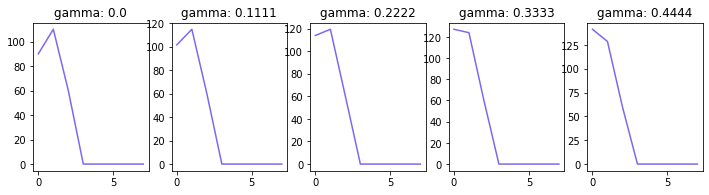

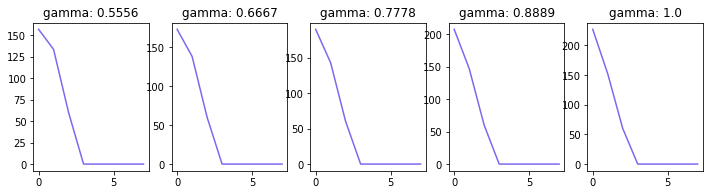

In [9]:
import matplotlib.pyplot as plt

X = [x / 9.0 for x in range(0, 10)]
Y = []
current_values = [0] * len(quiz_states)
for gamma in X:
    for k in range(0, 1000):
        new_values, best_actions = mdp_iterate(quiz_transition, quiz_reward, gamma, quiz_states, quiz_terminals, quiz_actions, current_values)
        current_values = new_values
    Y.append(new_values)

    
fig = plt.figure(figsize=(12, 6))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.gca().set_title(f'gamma: {round(X[i], 4)}')
    plt.plot(Y[i], color = 'mediumslateblue')

    
fig = plt.figure(figsize=(12, 6))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.gca().set_title(f'gamma: {round(X[i+5], 4)}')
    plt.plot(Y[i+5], color = 'mediumslateblue')


Here I drew the plot for 10 different gammas and plotted their best values. We can see that the values all converge to zero at some point. The actions do not differ that much because the final results are quite obvious and therefore the decisions are not that hard to make. When we get closer to the final actions, quitting makes more sense knowing the probability is decreasing aggressively. Almost to the point where taking the last steps is counted as a huge loss. The policy is not that dependent to the gamma variable because this example is not complicated enough.